### TUGAS MACHINE LEARNING LINEAR REGRESION


![image.png](https://th.bing.com/th/id/OIP.nfK3vGZkTa4GrO7yWpcS-QHaDT?pid=ImgDet&rs=1)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📊 Deskripsi Data:</font></h3>

* Iris data
* Hanya Gunakan 2 feature awal saja


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📊 1. Load the Iris data from scikit learn and divide the data into two parts: training and test data with ratio 80:20. Make sure that the class within each parts of the data is balance. (score: 1) :</font></h3>

In [1]:
import sys
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import math

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target


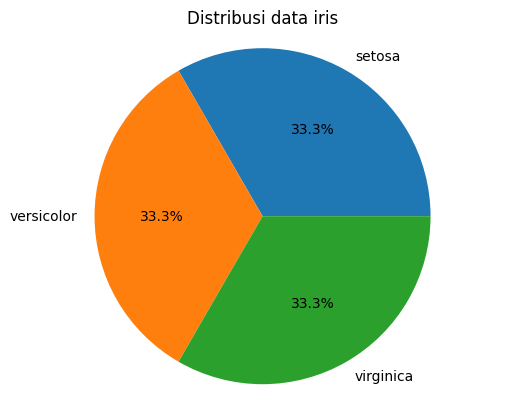

In [3]:
colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = iris.target_names
sizes = [sum(y == i) for i in range(len(labels))]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribusi data iris')
plt.show()

In [4]:
# kita acak dulu datanya agar modelnya bs random dan tidak terurut
np.random.seed(0)
shuffled_indices = np.random.permutation(len(X))
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

# rasio bagi
split_ratio = 0.8

# pisah data ke train dan test
train_size = int(split_ratio * len(X))
X_train, X_test = X_shuffled[:train_size], X_shuffled[train_size:]
y_train, y_test = y_shuffled[:train_size], y_shuffled[train_size:]

# lihat shapenya
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 2)
y_train shape: (120,)
X_test shape: (30, 2)
y_test shape: (30,)


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>
*  Dapat dilihat bahwa data ini balance sebab semua kelas memiliki persentase yang sama <br> 
*  Dapat dilihat juga bahwa data sudah terpisah menjadi train dan test data dengan rasio 120 : 30 atau 80 :20


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📊 2. Using scatter plot (matplotlib), visualise the Iris data (training part only) (score: 1) :</font></h3>

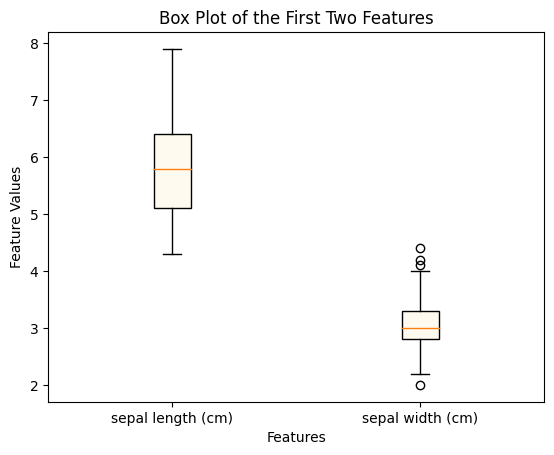

In [5]:
import matplotlib.pyplot as plt

feature_names = iris.feature_names[:2]

boxprops = dict(facecolor='#FFFAF0')

plt.boxplot(X, labels=feature_names, patch_artist=True, boxprops=boxprops,)
plt.xlabel('Features')
plt.ylabel('Feature Values')

plt.title('Box Plot of the First Two Features')
plt.show()


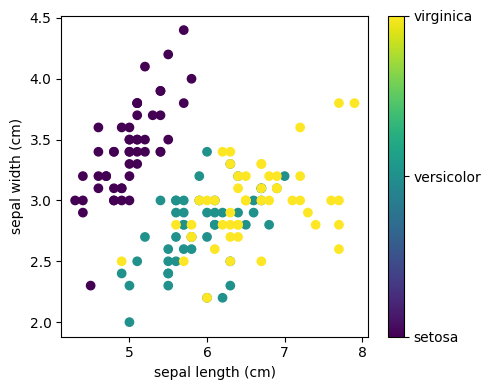

In [6]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📊 3. Define a python function for sigmoid function (score:1):</font></h3>

In [7]:
def sigmoid(z):
    # convert input to a numpy array
    z = np.array(z)
    
    # prepare variable g to store the value of sigmoid function of z
    g = np.zeros(z.shape)
    
    # sigmoid function
    g = 1 / (1 + np.exp(-z))
    return g

In [8]:
def softmax(z):
    exp_scores = np.exp(z)
    return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

![image.png](https://th.bing.com/th/id/OIP.4UgKKrQ5gg695ZUxAkdmTgHaDm?pid=ImgDet&rs=1)

<!-- <div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%;width:60%;margin: auto;text-align: center;">
<b>Insight:</b> Karena ini adalah multiclass, maka kita tidak akan gunakan sigmoid, namun kita gunakan softmax sebab sigmoid digunakan untuk binary saja</div> -->

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Insights:</font></h3>

*  Karena ini adalah multiclass, maka kita tidak akan gunakan sigmoid, namun kita gunakan softmax sebab sigmoid digunakan untuk binary saja.

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📊 4. Define a python function of the cost function and add regularisation (score:2)(score:1):</font></h3>

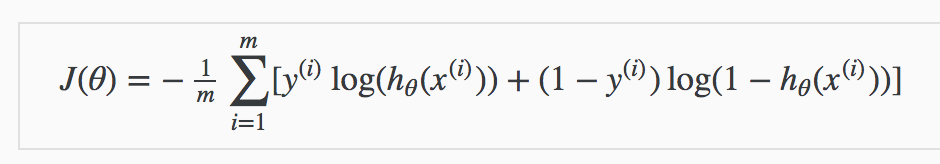

In [9]:
def compute_cost(X, y, w, b, lambda_,gradient=False):
    m = X.shape[0]
    z = np.dot(X, w) + b
    softmax_probs = softmax(z)
    log_probs = -np.log(softmax_probs[np.arange(m), y])
    loss = np.sum(log_probs) / m
    # regularization dilakukan di sini
    if gradient==True : 
        loss += (lambda_ / (2 * m)) * np.sum(w * w)
    else : 
        loss = np.sum(log_probs) / m
    return loss




<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📊 5. Define a python function for the Gradient Descent algorithm (score: 1):</font></h3>



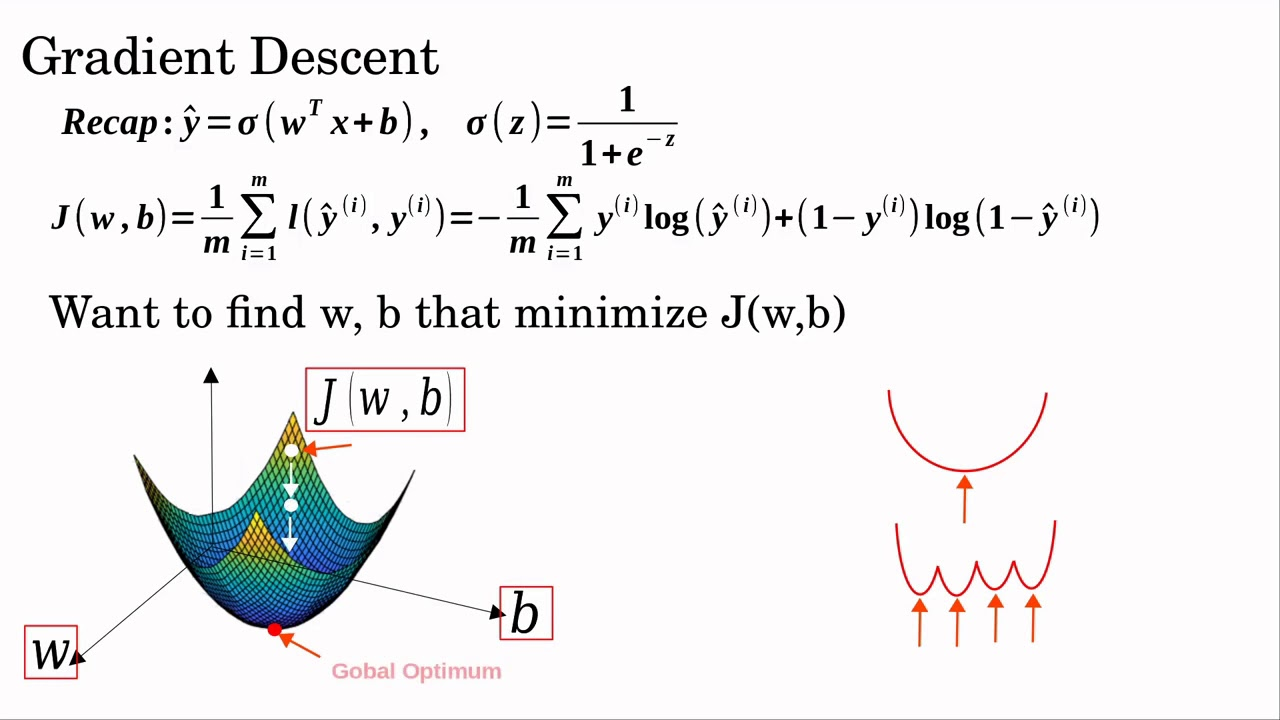 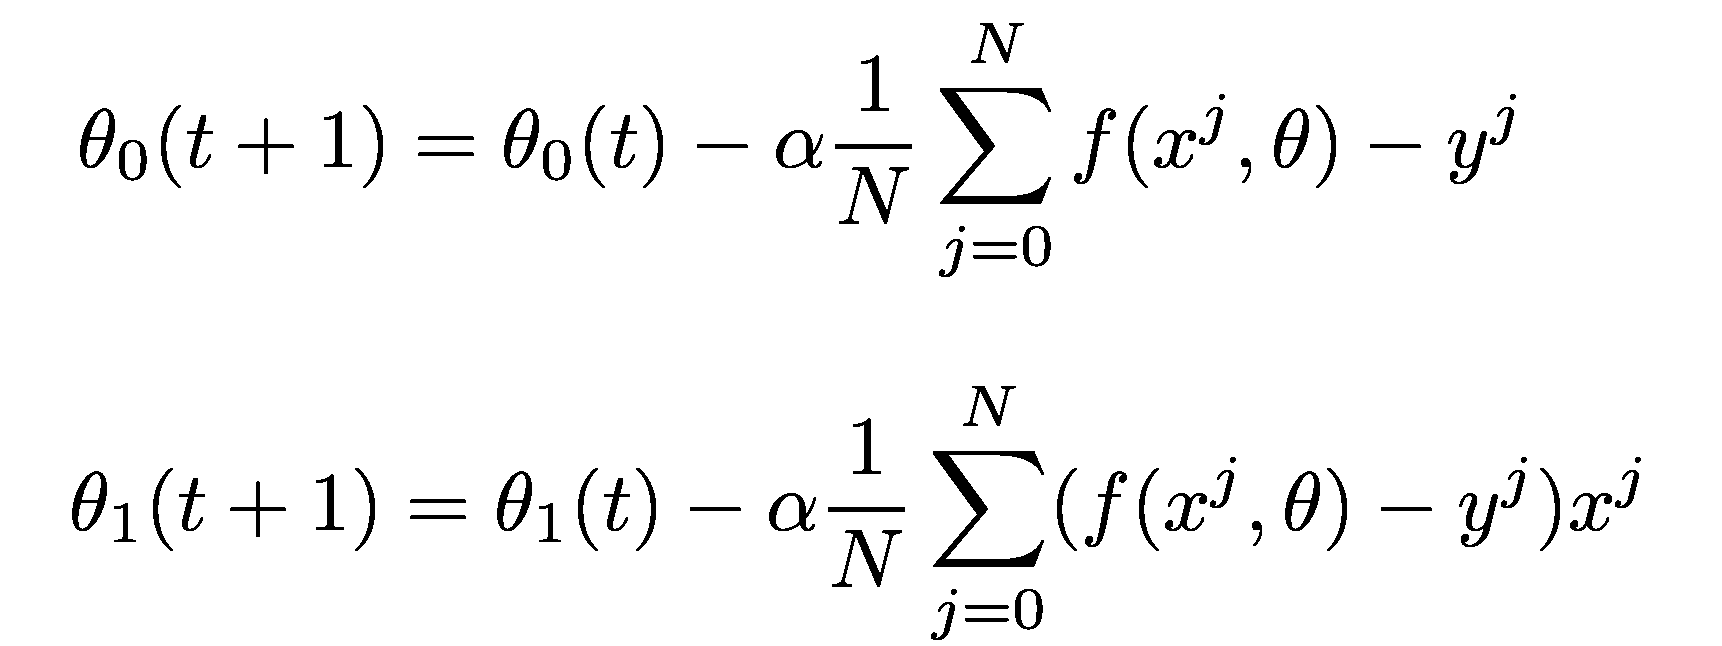![image.png](attachment:031e179e-24ba-4cb2-ac11-fb2af31b665a.png)

In [10]:
def compute_gradient(X, y, w, b, lambda_,gradient=False):
    m, n = X.shape
    num_classes = np.max(y) + 1

    dj_dw = np.zeros_like(w)
    dj_db = np.zeros_like(b)

    softmax_probs = softmax(np.dot(X, w) + b)

    for i in range(m):
        for j in range(num_classes):
            if j == y[i]:
                dj_dw[:, j] += (softmax_probs[i, j] - 1) * X[i]
                dj_db[0, j] += softmax_probs[i, j] - 1
            else:
                dj_dw[:, j] += softmax_probs[i, j] * X[i]
                dj_db[0, j] += softmax_probs[i, j]

    dj_dw /= m
    dj_db /= m
    
    if gradient==True : 
        # regularization ditambahkan di sini
        dj_dw += (lambda_ / m) * w
        

    return dj_dw, dj_db

In [11]:
def gradient_descent(X, y, w, b, cost_function, gradient_function, alpha, num_iters, lambda_,regularization=False):
    J_history = []

    for _ in range(num_iters):
        if regularization==False : 
            cost = cost_function(X, y, w, b, lambda_)
        else : 
            cost = cost_function(X, y, w, b, lambda_,gradient=True)
            
        J_history.append(cost)
        if regularization==False :
            dj_dw, dj_db = gradient_function(X, y, w, b, lambda_)
        else :
            dj_dw, dj_db = gradient_function(X, y, w, b, lambda_,gradient=True)
        w -= alpha * dj_dw
        b -= alpha * dj_db

    return w, b, J_history

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📊 6. Train your Logistic Regression algorithm on the training data, set learning rate: 0.001 and maximum iteration: 100 (score: 1.5)
:</font></h3>



In [12]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    softmax_probs = softmax(z)
    return np.argmax(softmax_probs, axis=1)


In [13]:
# Kita normalisasikan dahulu datanya
X_normalized = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

num_classes=3
# Random initialization
np.random.seed(1)
initial_w = 0.01 * (np.random.randn(2, num_classes))
initial_b = np.zeros((1, num_classes))

# Gradient descent settings
iterations = 100
learning_rate = 0.001
lambda_ = 10

# Train the logistic regression model
w, b, J_history = gradient_descent(X_normalized, y_train, initial_w, initial_b,
                                   compute_cost, compute_gradient, learning_rate, iterations, lambda_,regularization=True)

In [14]:
y_pred = predict(X_normalized, w, b)

# Akurasi
accuracy = np.mean(y_pred == y_train)
print(accuracy)

0.6666666666666666


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📊7. Find thetha(s) that minimize the cost function, and plot the decision boundary using matplotlib. (score: 1):</font></h3>



In [15]:
reg_params=[0.01,0.1,1,10,100,1000,10000,100000]
acc=[]
for i in reg_params : 
    X_normalized = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

    num_classes=3
    # Random initialization
    np.random.seed(1)
    initial_w = 0.01 * (np.random.randn(2, num_classes))
    initial_b = np.zeros((1, num_classes))

    # Gradient descent settings
    iterations = 100
    learning_rate = 0.001
    lambda_ = i

    # Train the logistic regression model
    w, b, J_history = gradient_descent(X_normalized, y_train, initial_w, initial_b,
                                       compute_cost, compute_gradient, learning_rate, iterations, lambda_,regularization=True)
    y_pred = predict(X_normalized, w, b)

    # Akurasi
    accuracy = np.mean(y_pred == y_train)
    acc.append(accuracy)
    
    

In [16]:
df = pd.DataFrame({'reg_params': reg_params, 'accuracy': acc})
df.sort_values(by="accuracy",ascending=False)


,reg_params,accuracy
6,10000.00,0.733333
5,1000.00,0.700000
0,0.01,0.666667
1,0.10,0.666667
2,1.00,0.666667
3,10.00,0.666667
4,100.00,0.666667
7,100000.00,0.641667


In [17]:
def plot_data(X, y, label_1="x", label_2="o", label_3="+"):
    class_1 = y == 0
    class_2 = y == 1
    class_3 = y == 2
    
    # Plot
    plt.plot(X[class_1, 0], X[class_1, 1], 'k' + label_1, label="Label 1")
    plt.plot(X[class_2, 0], X[class_2, 1], 'r' + label_2, label="Label 2")
    plt.plot(X[class_3, 0], X[class_3, 1], 'b' + label_3, label="Label 3")

def plot_decision_boundary(w, b, X, y):
    plot_data(X[:, :2], y)
    
    if X.shape[1] == 2:
        for i in range(w.shape[1]):
            plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
            plot_y = (-1. / w[1, i]) * (w[0, i] * plot_x + b[0, i])
            
            if i == 0:
                color = 'k'
                fill_color = 'lightgray'
            elif i == 1:
                color = 'r'
                fill_color = 'mistyrose'
            elif i == 2:
                color = 'b'
                fill_color = 'lightblue'
            
            plt.plot(plot_x, plot_y, color + '-', label=f"Decision boundary {i+1}")
            plt.fill_between(plot_x, plot_y, alpha=0.2, color=fill_color)
            
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        plt.plot([x_min, x_max], [y_min, y_min], 'k--', linewidth=2)
        plt.plot([x_min, x_max], [y_max, y_max], 'k--', linewidth=2)
        plt.plot([x_min, x_min], [y_min, y_max], 'k--', linewidth=2)
        plt.plot([x_max, x_max], [y_min, y_max], 'k--', linewidth=2)
        
    plt.legend()




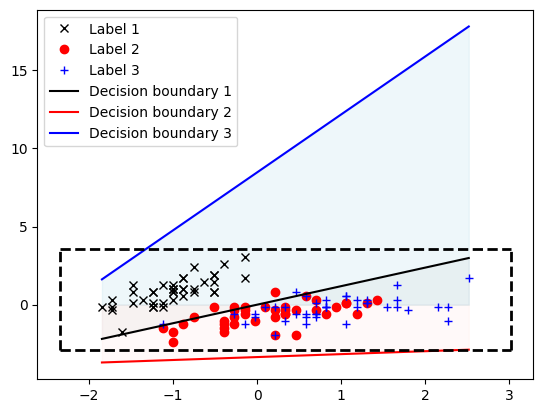

In [18]:
plot_decision_boundary(w, b, X_normalized, y_train)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📊8. Test your Logistic Regression model on the test data, and calculate the accuracy (create function for accuracy, do not use the function from scikit learn library) (score: 1.5) :</font></h3>



In [19]:
def accuracy(X,y,w,b) :
    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    y_pred = predict(X_normalized, w, b)

    # Akurasi
    accuracy = np.mean(y_pred == y)
    return accuracy 

In [20]:
def run_test(X,y,iteration,lr,lambda_,regularization=False) :
    X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    num_classes=3
    # Random initialization
    np.random.seed(1)
    initial_w = 0.01 * (np.random.randn(2, num_classes))
    initial_b = np.zeros((1, num_classes))

    # Gradient descent settings
    iterations = iteration
    learning_rate = lr
    lambda_ = lambda_

    # Train the logistic regression model
    if regularization==False : 
        w, b, J_history = gradient_descent(X_normalized, y, initial_w, initial_b,
                                           compute_cost, compute_gradient, learning_rate, iterations, lambda_,regularization=False)
    else :
        w, b, J_history = gradient_descent(X_normalized, y, initial_w, initial_b,
                                   compute_cost, compute_gradient, learning_rate, iterations, lambda_,regularization=True)
    return w,b,J_history

In [21]:
w,b,cost_history=run_test(X_train,y_train,lr=0.001,iteration=100,lambda_=10000,regularization=True)
accuracy(X_test,y_test,w,b)

0.7666666666666667

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📊 9. Plot your cost function using matplotlib (cost function vs iteration) (score: 1) :</font></h3>



In [22]:
def plot_cost_function(cost_values):
    iterations = range(len(cost_values))
    
    plt.plot(iterations, cost_values)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost Function')
    plt.show()


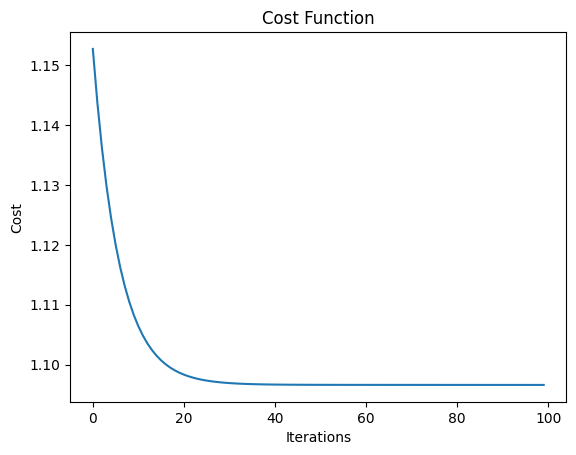

In [23]:
plot_cost_function(cost_history)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>📊 10. Compare your Logistic Regression model with and without regularisation, you can compare by the values of thetha in both of the model (in plot or in table) (score: 2) :</font></h3>



In [24]:
def compare(X_train,y_train,X_test,y_test) :
    X_train=X
    y_train=y
    X_test=X_test
    y_test=y_test
    reg_params=[0.01,0.1,1,10,100,1000,10000,100000]
    reg=[]
    noreg=[]
    for i in reg_params : 
        w,b,cost_history=run_test(X_train,y_train,lr=0.001,iteration=100,lambda_=i,regularization=True)
        acc=accuracy(X_test,y_test,w,b)
        reg.append(acc)
        w,b,cost_history=run_test(X_train,y_train,lr=0.001,iteration=100,lambda_=10000,regularization=False)
        acc=accuracy(X_test,y_test,w,b)
        noreg.append(acc)
    return reg,noreg



In [25]:
reg,noreg=compare(X_train,y_train,X_test,y_test)

In [26]:
reg_params=[0.01,0.1,1,10,100,1000,10000,100000]
compared = pd.DataFrame({'reg_params': reg_params, 'no_reg_accuracy': noreg,'regularization_acc': reg})
compared


,reg_params,no_reg_accuracy,regularization_acc
0,0.01,0.6,0.600000
1,0.10,0.6,0.600000
2,1.00,0.6,0.600000
3,10.00,0.6,0.600000
4,100.00,0.6,0.600000
5,1000.00,0.6,0.700000
6,10000.00,0.6,0.833333
7,100000.00,0.6,0.833333


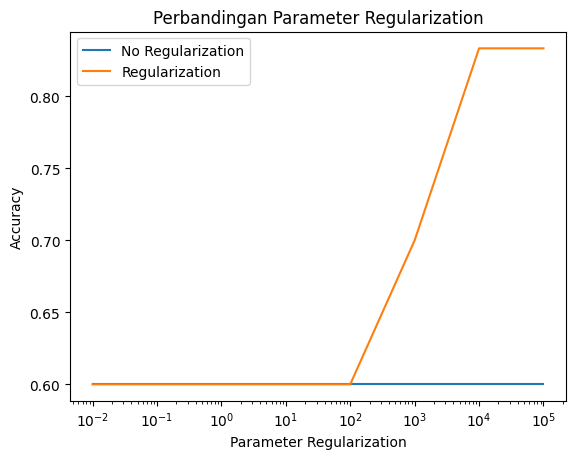

In [27]:
noreg_accuracy = noreg
regularization_accuracy = reg

plt.plot(reg_params, noreg_accuracy, label='No Regularization')
plt.plot(reg_params, regularization_accuracy, label='Regularization')
plt.xscale('log')
plt.xlabel('Parameter Regularization')
plt.ylabel('Accuracy')
plt.title('Perbandingan Parameter Regularization')
plt.legend()
plt.show()